## <u>Maritime Shipping Industry Data Analysis and Prediction</u>
### Chow Tsz Chun Samuel
### Phuc Thien Bao Nguyen, Peter
<br>

## Phase 2 - Objective(s)
- ### Use separate coding file for 53451, 534546 and 549305 Dataset
- ### Data Preparation for Time Series Data
- ### Perform Standardization To the Data
- ### Apply different feature selection thresold to the dataset on differnt models
- ### (1) Use All Features to Test the Result on following Models under default configuration
    - #### Linear Regression
    - #### Lasso Regression
    - #### Ridge Regression
    - #### Decision Tree Regression (DTR)
    - #### Random Forest (RF)
    - #### Support Vector Regression (SVR)
    - #### Extreme Gradient Bossting (XGBoost)
    - #### Multilayer Perceptron (MLP)
- ### (2) Apply Grid Search To find the best configuration on each Model
    - #### Recalculate the accuracy 

In [2]:
!pip install pandas
!pip install matplotlib
!pip install numpy
!python -m pip install --upgrade pip
!pip install ipywidgets
!pip install xgboost

Python was not found; run without arguments to install from the Microsoft Store, or disable this shortcut from Settings > Manage App Execution Aliases.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Markdown, display

## <font color='green'>This Code works on the (549305) Dataset

## (A) Manual Data Preparation (549305 dataset)
### - Remove the Data Column
### - Shift the Result of 549305 by ONE Row
### - Remove the LAST ROW of Other Features 
### - then here import the modified csv file as dataframe

In [6]:
dataset_name = '549305'
dataset_name_with_date = f"{dataset_name}_with_date"
dataset_file_name = f"dataset/{dataset_name}_shifted.csv"

In [7]:
dataset = {
    dataset_name_with_date : pd.read_csv(dataset_file_name)
}

In [8]:
df_group = {
    dataset_name : dataset[dataset_name_with_date].drop(['date'], axis=1)
}

In [9]:
df_group[dataset_name]

,549305,69870,29845,69839+542292+542548+542544,4164579,43515,49881,94884,14392,531097+543452+49696+51597+542904+544000,...,547018,22788,10511218,528444,38498,19671,45145,98000,8852112,10952
0,110.59000,17663.99227,286.49502,18519.79,1.61,990.95000,16480.18185,100.00000,5.6875,16998.22387,...,283.19,1900.00,1.57,377,103.45742,111.50,3600321,0.6300,11.29,8.00623
1,129.03000,22289.85253,287.47990,19767.62,1.64,1142.95238,17102.74785,101.71544,5.9375,21575.22670,...,280.88,1890.00,1.57,382,105.10912,113.25,3272514,0.9000,11.31,8.20910
2,120.89000,26044.21218,286.05289,20584.50,1.61,1285.95652,17989.32158,107.52593,6.0000,25680.26122,...,278.58,2091.00,1.57,397,105.73986,112.40,3372011,1.1500,11.32,8.38826
3,124.32000,23480.27946,286.51762,20584.50,1.59,1281.83333,21825.75467,112.86937,6.0000,22358.25062,...,276.27,2029.00,1.56,330,103.99441,112.00,3482104,1.2400,11.32,8.66177
4,169.06000,27744.56063,287.31110,20498.74,1.56,1428.19048,21583.57754,112.86937,6.0000,29055.85285,...,271.66,2079.00,1.56,409,105.91260,116.50,3796788,1.6000,11.35,9.11050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,117.86636,42874.94231,685.42458,31937.50,5.17,935.14286,22581.04705,196.06418,5.0000,22915.71320,...,271.00,538.00,0.34,462,184.76796,346.75,14318130,2.8250,11.40,10.24245
283,98.68250,24406.13501,686.70010,29812.50,5.29,798.90909,29494.00242,196.34199,5.2500,13391.47337,...,266.00,533.45,0.61,471,184.86106,319.00,14324683,3.6875,11.49,10.45107
284,185.73955,17439.35227,687.53170,29750.00,5.29,755.90476,30245.58786,198.09863,5.2500,10659.15408,...,265.00,486.60,0.74,514,185.30908,314.80,15019362,3.9000,11.67,10.68618
285,213.32950,55879.34460,688.13642,29750.00,5.29,1146.18182,38101.47544,207.43823,5.2500,26286.06540,...,263.00,511.30,0.50,550,185.30908,296.25,15367007,4.2250,11.62,11.02928


## (B) Data Wrangling
<br>

### <b>(B1) <u>Data validation</u></b>
### The very first step after extraction is verifying the data on checking if included invalid value
### The dataset is clear without any NULL value

In [11]:
df_group[dataset_name].isnull().sum()

549305                                     0
69870                                      0
29845                                      0
69839+542292+542548+542544                 0
4164579                                    0
43515                                      0
49881                                      0
94884                                      0
14392                                      0
531097+543452+49696+51597+542904+544000    0
22809                                      0
21986                                      0
45390                                      0
51642+49780+531117+543508+544056+542960    0
11278870                                   0
534659                                     0
548430                                     0
22539                                      0
10743792                                   0
542928+544024+531125+543476+49700          0
547003                                     0
97726                                      0
10722105  

In [12]:
correlation = df_group[dataset_name].corr().round(2)

target = "549305"
thresholds = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
features_group_size = len(thresholds)
df_featureSelected = []

target_correlation = correlation[target]

for i in range(features_group_size):
    features_above_threshold = target_correlation[abs(target_correlation) >= thresholds[i]].index.tolist()

    # Remove the target itself from the list
    features_above_threshold.remove(target)

    df_featureSelected.append(df_group[dataset_name].filter(items=features_above_threshold))

    display(df_featureSelected[-1])

,69870,29845,69839+542292+542548+542544,4164579,43515,49881,94884,14392,531097+543452+49696+51597+542904+544000,22809,...,547018,22788,10511218,528444,38498,19671,45145,98000,8852112,10952
0,17663.99227,286.49502,18519.79,1.61,990.95000,16480.18185,100.00000,5.6875,16998.22387,2008.000,...,283.19,1900.00,1.57,377,103.45742,111.50,3600321,0.6300,11.29,8.00623
1,22289.85253,287.47990,19767.62,1.64,1142.95238,17102.74785,101.71544,5.9375,21575.22670,1861.000,...,280.88,1890.00,1.57,382,105.10912,113.25,3272514,0.9000,11.31,8.20910
2,26044.21218,286.05289,20584.50,1.61,1285.95652,17989.32158,107.52593,6.0000,25680.26122,2004.000,...,278.58,2091.00,1.57,397,105.73986,112.40,3372011,1.1500,11.32,8.38826
3,23480.27946,286.51762,20584.50,1.59,1281.83333,21825.75467,112.86937,6.0000,22358.25062,1977.000,...,276.27,2029.00,1.56,330,103.99441,112.00,3482104,1.2400,11.32,8.66177
4,27744.56063,287.31110,20498.74,1.56,1428.19048,21583.57754,112.86937,6.0000,29055.85285,2175.000,...,271.66,2079.00,1.56,409,105.91260,116.50,3796788,1.6000,11.35,9.11050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,42874.94231,685.42458,31937.50,5.17,935.14286,22581.04705,196.06418,5.0000,22915.71320,3961.550,...,271.00,538.00,0.34,462,184.76796,346.75,14318130,2.8250,11.40,10.24245
283,24406.13501,686.70010,29812.50,5.29,798.90909,29494.00242,196.34199,5.2500,13391.47337,3893.257,...,266.00,533.45,0.61,471,184.86106,319.00,14324683,3.6875,11.49,10.45107
284,17439.35227,687.53170,29750.00,5.29,755.90476,30245.58786,198.09863,5.2500,10659.15408,3861.336,...,265.00,486.60,0.74,514,185.30908,314.80,15019362,3.9000,11.67,10.68618
285,55879.34460,688.13642,29750.00,5.29,1146.18182,38101.47544,207.43823,5.2500,26286.06540,3824.365,...,263.00,511.30,0.50,550,185.30908,296.25,15367007,4.2250,11.62,11.02928


,69870,29845,69839+542292+542548+542544,4164579,43515,49881,94884,14392,531097+543452+49696+51597+542904+544000,22809,...,56449,10509911,547018,10511218,528444,38498,45145,98000,8852112,10952
0,17663.99227,286.49502,18519.79,1.61,990.95000,16480.18185,100.00000,5.6875,16998.22387,2008.000,...,0.02079,10.18,283.19,1.57,377,103.45742,3600321,0.6300,11.29,8.00623
1,22289.85253,287.47990,19767.62,1.64,1142.95238,17102.74785,101.71544,5.9375,21575.22670,1861.000,...,0.03830,10.36,280.88,1.57,382,105.10912,3272514,0.9000,11.31,8.20910
2,26044.21218,286.05289,20584.50,1.61,1285.95652,17989.32158,107.52593,6.0000,25680.26122,2004.000,...,0.09428,10.18,278.58,1.57,397,105.73986,3372011,1.1500,11.32,8.38826
3,23480.27946,286.51762,20584.50,1.59,1281.83333,21825.75467,112.86937,6.0000,22358.25062,1977.000,...,0.14866,10.15,276.27,1.56,330,103.99441,3482104,1.2400,11.32,8.66177
4,27744.56063,287.31110,20498.74,1.56,1428.19048,21583.57754,112.86937,6.0000,29055.85285,2175.000,...,0.14519,10.24,271.66,1.56,409,105.91260,3796788,1.6000,11.35,9.11050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,42874.94231,685.42458,31937.50,5.17,935.14286,22581.04705,196.06418,5.0000,22915.71320,3961.550,...,0.15442,9.11,271.00,0.34,462,184.76796,14318130,2.8250,11.40,10.24245
283,24406.13501,686.70010,29812.50,5.29,798.90909,29494.00242,196.34199,5.2500,13391.47337,3893.257,...,0.11111,8.78,266.00,0.61,471,184.86106,14324683,3.6875,11.49,10.45107
284,17439.35227,687.53170,29750.00,5.29,755.90476,30245.58786,198.09863,5.2500,10659.15408,3861.336,...,0.09231,9.96,265.00,0.74,514,185.30908,15019362,3.9000,11.67,10.68618
285,55879.34460,688.13642,29750.00,5.29,1146.18182,38101.47544,207.43823,5.2500,26286.06540,3824.365,...,0.14832,8.92,263.00,0.50,550,185.30908,15367007,4.2250,11.62,11.02928


,69870,69839+542292+542548+542544,4164579,43515,49881,94884,14392,531097+543452+49696+51597+542904+544000,22809,51642+49780+531117+543508+544056+542960,...,530423,43520,11279456,56449,10509911,547018,10511218,38498,98000,8852112
0,17663.99227,18519.79,1.61,990.95000,16480.18185,100.00000,5.6875,16998.22387,2008.000,15827.75916,...,4.26690,706.35000,3.33,0.02079,10.18,283.19,1.57,103.45742,0.6300,11.29
1,22289.85253,19767.62,1.64,1142.95238,17102.74785,101.71544,5.9375,21575.22670,1861.000,20167.28874,...,6.29880,802.14286,3.31,0.03830,10.36,280.88,1.57,105.10912,0.9000,11.31
2,26044.21218,20584.50,1.61,1285.95652,17989.32158,107.52593,6.0000,25680.26122,2004.000,26340.12330,...,4.34760,809.39130,3.32,0.09428,10.18,278.58,1.57,105.73986,1.1500,11.32
3,23480.27946,20584.50,1.59,1281.83333,21825.75467,112.86937,6.0000,22358.25062,1977.000,19864.75174,...,3.94940,896.61111,3.34,0.14866,10.15,276.27,1.56,103.99441,1.2400,11.32
4,27744.56063,20498.74,1.56,1428.19048,21583.57754,112.86937,6.0000,29055.85285,2175.000,23061.70301,...,3.59820,925.42857,3.40,0.14519,10.24,271.66,1.56,105.91260,1.6000,11.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,42874.94231,31937.50,5.17,935.14286,22581.04705,196.06418,5.0000,22915.71320,3961.550,44697.53927,...,2.00000,615.95238,15.33,0.15442,9.11,271.00,0.34,184.76796,2.8250,11.40
283,24406.13501,29812.50,5.29,798.90909,29494.00242,196.34199,5.2500,13391.47337,3893.257,23643.56070,...,2.00000,744.18182,12.97,0.11111,8.78,266.00,0.61,184.86106,3.6875,11.49
284,17439.35227,29750.00,5.29,755.90476,30245.58786,198.09863,5.2500,10659.15408,3861.336,14782.89969,...,2.00000,818.76191,14.38,0.09231,9.96,265.00,0.74,185.30908,3.9000,11.67
285,55879.34460,29750.00,5.29,1146.18182,38101.47544,207.43823,5.2500,26286.06540,3824.365,61152.72545,...,3.18182,777.86364,15.19,0.14832,8.92,263.00,0.50,185.30908,4.2250,11.62


,69870,69839+542292+542548+542544,4164579,43515,49881,94884,14392,531097+543452+49696+51597+542904+544000,22809,51642+49780+531117+543508+544056+542960,11278870,542928+544024+531125+543476+49700,97726,19049,14948,69832,43520,56449,38498,98000
0,17663.99227,18519.79,1.61,990.95000,16480.18185,100.00000,5.6875,16998.22387,2008.000,15827.75916,8.56,19677.60538,14143.40183,95.01436,6.21094,128.110,706.35000,0.02079,103.45742,0.6300
1,22289.85253,19767.62,1.64,1142.95238,17102.74785,101.71544,5.9375,21575.22670,1861.000,20167.28874,10.06,36590.02901,17124.75941,93.57675,6.32031,146.750,802.14286,0.03830,105.10912,0.9000
2,26044.21218,20584.50,1.61,1285.95652,17989.32158,107.52593,6.0000,25680.26122,2004.000,26340.12330,11.50,35199.29811,18825.15200,97.53243,6.41250,183.300,809.39130,0.09428,105.73986,1.1500
3,23480.27946,20584.50,1.59,1281.83333,21825.75467,112.86937,6.0000,22358.25062,1977.000,19864.75174,11.99,29974.32101,20536.52947,102.37925,6.53906,163.230,896.61111,0.14866,103.99441,1.2400
4,27744.56063,20498.74,1.56,1428.19048,21583.57754,112.86937,6.0000,29055.85285,2175.000,23061.70301,14.06,38831.03773,22776.86395,100.22159,6.92969,177.560,925.42857,0.14519,105.91260,1.6000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,42874.94231,31937.50,5.17,935.14286,22581.04705,196.06418,5.0000,22915.71320,3961.550,44697.53927,38.70,47081.54097,30341.09311,96.42801,5.83756,156.250,615.95238,0.15442,184.76796,2.8250
283,24406.13501,29812.50,5.29,798.90909,29494.00242,196.34199,5.2500,13391.47337,3893.257,23643.56070,31.59,17335.72804,28426.38688,96.56464,5.86707,125.000,744.18182,0.11111,184.86106,3.6875
284,17439.35227,29750.00,5.29,755.90476,30245.58786,198.09863,5.2500,10659.15408,3861.336,14782.89969,34.38,13019.16234,27019.14807,97.10953,5.89652,117.000,818.76191,0.09231,185.30908,3.9000
285,55879.34460,29750.00,5.29,1146.18182,38101.47544,207.43823,5.2500,26286.06540,3824.365,61152.72545,32.99,62156.44691,37770.81668,101.68788,5.89627,179.375,777.86364,0.14832,185.30908,4.2250


,69870,69839+542292+542548+542544,43515,49881,94884,14392,531097+543452+49696+51597+542904+544000,51642+49780+531117+543508+544056+542960,11278870,542928+544024+531125+543476+49700,97726,19049,14948,69832,43520,56449,98000
0,17663.99227,18519.79,990.95000,16480.18185,100.00000,5.6875,16998.22387,15827.75916,8.56,19677.60538,14143.40183,95.01436,6.21094,128.110,706.35000,0.02079,0.6300
1,22289.85253,19767.62,1142.95238,17102.74785,101.71544,5.9375,21575.22670,20167.28874,10.06,36590.02901,17124.75941,93.57675,6.32031,146.750,802.14286,0.03830,0.9000
2,26044.21218,20584.50,1285.95652,17989.32158,107.52593,6.0000,25680.26122,26340.12330,11.50,35199.29811,18825.15200,97.53243,6.41250,183.300,809.39130,0.09428,1.1500
3,23480.27946,20584.50,1281.83333,21825.75467,112.86937,6.0000,22358.25062,19864.75174,11.99,29974.32101,20536.52947,102.37925,6.53906,163.230,896.61111,0.14866,1.2400
4,27744.56063,20498.74,1428.19048,21583.57754,112.86937,6.0000,29055.85285,23061.70301,14.06,38831.03773,22776.86395,100.22159,6.92969,177.560,925.42857,0.14519,1.6000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,42874.94231,31937.50,935.14286,22581.04705,196.06418,5.0000,22915.71320,44697.53927,38.70,47081.54097,30341.09311,96.42801,5.83756,156.250,615.95238,0.15442,2.8250
283,24406.13501,29812.50,798.90909,29494.00242,196.34199,5.2500,13391.47337,23643.56070,31.59,17335.72804,28426.38688,96.56464,5.86707,125.000,744.18182,0.11111,3.6875
284,17439.35227,29750.00,755.90476,30245.58786,198.09863,5.2500,10659.15408,14782.89969,34.38,13019.16234,27019.14807,97.10953,5.89652,117.000,818.76191,0.09231,3.9000
285,55879.34460,29750.00,1146.18182,38101.47544,207.43823,5.2500,26286.06540,61152.72545,32.99,62156.44691,37770.81668,101.68788,5.89627,179.375,777.86364,0.14832,4.2250


,69870,69839+542292+542548+542544,43515,49881,94884,14392,531097+543452+49696+51597+542904+544000,51642+49780+531117+543508+544056+542960,11278870,542928+544024+531125+543476+49700,97726,14948,69832,43520,56449
0,17663.99227,18519.79,990.95000,16480.18185,100.00000,5.6875,16998.22387,15827.75916,8.56,19677.60538,14143.40183,6.21094,128.110,706.35000,0.02079
1,22289.85253,19767.62,1142.95238,17102.74785,101.71544,5.9375,21575.22670,20167.28874,10.06,36590.02901,17124.75941,6.32031,146.750,802.14286,0.03830
2,26044.21218,20584.50,1285.95652,17989.32158,107.52593,6.0000,25680.26122,26340.12330,11.50,35199.29811,18825.15200,6.41250,183.300,809.39130,0.09428
3,23480.27946,20584.50,1281.83333,21825.75467,112.86937,6.0000,22358.25062,19864.75174,11.99,29974.32101,20536.52947,6.53906,163.230,896.61111,0.14866
4,27744.56063,20498.74,1428.19048,21583.57754,112.86937,6.0000,29055.85285,23061.70301,14.06,38831.03773,22776.86395,6.92969,177.560,925.42857,0.14519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,42874.94231,31937.50,935.14286,22581.04705,196.06418,5.0000,22915.71320,44697.53927,38.70,47081.54097,30341.09311,5.83756,156.250,615.95238,0.15442
283,24406.13501,29812.50,798.90909,29494.00242,196.34199,5.2500,13391.47337,23643.56070,31.59,17335.72804,28426.38688,5.86707,125.000,744.18182,0.11111
284,17439.35227,29750.00,755.90476,30245.58786,198.09863,5.2500,10659.15408,14782.89969,34.38,13019.16234,27019.14807,5.89652,117.000,818.76191,0.09231
285,55879.34460,29750.00,1146.18182,38101.47544,207.43823,5.2500,26286.06540,61152.72545,32.99,62156.44691,37770.81668,5.89627,179.375,777.86364,0.14832


,69870,43515,531097+543452+49696+51597+542904+544000,542928+544024+531125+543476+49700,97726,69832,43520
0,17663.99227,990.95000,16998.22387,19677.60538,14143.40183,128.110,706.35000
1,22289.85253,1142.95238,21575.22670,36590.02901,17124.75941,146.750,802.14286
2,26044.21218,1285.95652,25680.26122,35199.29811,18825.15200,183.300,809.39130
3,23480.27946,1281.83333,22358.25062,29974.32101,20536.52947,163.230,896.61111
4,27744.56063,1428.19048,29055.85285,38831.03773,22776.86395,177.560,925.42857
...,...,...,...,...,...,...,...
282,42874.94231,935.14286,22915.71320,47081.54097,30341.09311,156.250,615.95238
283,24406.13501,798.90909,13391.47337,17335.72804,28426.38688,125.000,744.18182
284,17439.35227,755.90476,10659.15408,13019.16234,27019.14807,117.000,818.76191
285,55879.34460,1146.18182,26286.06540,62156.44691,37770.81668,179.375,777.86364


,69870,43515,542928+544024+531125+543476+49700,97726,69832
0,17663.99227,990.95000,19677.60538,14143.40183,128.110
1,22289.85253,1142.95238,36590.02901,17124.75941,146.750
2,26044.21218,1285.95652,35199.29811,18825.15200,183.300
3,23480.27946,1281.83333,29974.32101,20536.52947,163.230
4,27744.56063,1428.19048,38831.03773,22776.86395,177.560
...,...,...,...,...,...
282,42874.94231,935.14286,47081.54097,30341.09311,156.250
283,24406.13501,798.90909,17335.72804,28426.38688,125.000
284,17439.35227,755.90476,13019.16234,27019.14807,117.000
285,55879.34460,1146.18182,62156.44691,37770.81668,179.375


### <b>(B2) <u>Split X Features and y result</u></b>

In [14]:
# A list of different features selected input
Xs = df_featureSelected #df_group[dataset_name].iloc[:, 1:]
print(type(Xs[0]))

<class 'pandas.core.frame.DataFrame'>


In [15]:
y = df_group[dataset_name].iloc[:, 0]
y

0      110.59000
1      129.03000
2      120.89000
3      124.32000
4      169.06000
         ...    
282    117.86636
283     98.68250
284    185.73955
285    213.32950
286    160.17688
Name: 549305, Length: 287, dtype: float64

In [16]:
!pip install scikit-learn

### <b>(B3) <u>Data Normalization</u></b>
#### Since the X Features data ranging from single digit to $10^5$ scale, it is essential to perform <font color="blue">Normalization</font>
<br>

### <font color="blue">Max Min Normalization</font> is chosen

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
bApplyNormalization = 1

norm_Xs = [df.copy() for df in Xs]
print(type(Xs[0]))

if bApplyNormalization:
    for i in range(features_group_size):
        scalerMaxMin = MinMaxScaler(feature_range=(0, 1))
        norm_Xs[i] = scalerMaxMin.fit_transform(Xs[i])

<class 'pandas.core.frame.DataFrame'>


In [20]:
norm_Xs

[array([[0.14654257, 0.00263138, 0.10324805, ..., 0.        , 0.16891892,
         0.49445211],
        [0.19235877, 0.00507521, 0.16703489, ..., 0.04864865, 0.18243243,
         0.52837828],
        [0.22954332, 0.0015343 , 0.20879233, ..., 0.09369369, 0.18918919,
         0.5583394 ],
        ...,
        [0.14431765, 0.99774517, 0.67731629, ..., 0.58918919, 0.42567568,
         0.94262302],
        [0.52504132, 0.99924569, 0.67731629, ..., 0.64774775, 0.39189189,
         1.        ],
        [0.75293324, 1.        , 0.67731629, ..., 0.56216216, 0.2972973 ,
         0.99729755]]),
 array([[0.14654257, 0.00263138, 0.10324805, ..., 0.        , 0.16891892,
         0.49445211],
        [0.19235877, 0.00507521, 0.16703489, ..., 0.04864865, 0.18243243,
         0.52837828],
        [0.22954332, 0.0015343 , 0.20879233, ..., 0.09369369, 0.18918919,
         0.5583394 ],
        ...,
        [0.14431765, 0.99774517, 0.67731629, ..., 0.58918919, 0.42567568,
         0.94262302],
        [0.5

In [21]:
norm_Xs_df = []
for i in range(features_group_size):
    norm_Xs_df.append(pd.DataFrame(norm_Xs[i], columns=Xs[i].columns))
    display(norm_Xs_df[-1])

,69870,29845,69839+542292+542548+542544,4164579,43515,49881,94884,14392,531097+543452+49696+51597+542904+544000,22809,...,547018,22788,10511218,528444,38498,19671,45145,98000,8852112,10952
0,0.146543,0.002631,0.103248,0.032468,0.217240,0.196029,0.008188,0.947034,0.189361,0.110844,...,0.385079,0.553093,0.867403,0.293307,0.042300,0.000000,0.010758,0.000000,0.168919,0.494452
1,0.192359,0.005075,0.167035,0.038961,0.275025,0.202623,0.018371,0.989407,0.240414,0.052021,...,0.358278,0.549785,0.867403,0.303150,0.053815,0.004284,0.000000,0.048649,0.182432,0.528378
2,0.229543,0.001534,0.208792,0.032468,0.329389,0.212014,0.052861,1.000000,0.286203,0.109244,...,0.331593,0.616275,0.867403,0.332677,0.058212,0.002203,0.003265,0.093694,0.189189,0.558339
3,0.204149,0.002687,0.208792,0.028139,0.327821,0.252649,0.084580,1.000000,0.249148,0.098439,...,0.304792,0.595766,0.861878,0.200787,0.046043,0.001224,0.006878,0.109910,0.189189,0.604079
4,0.246384,0.004656,0.204408,0.021645,0.383460,0.250084,0.084580,1.000000,0.323855,0.177671,...,0.251305,0.612306,0.861878,0.356299,0.059416,0.012240,0.017205,0.174775,0.209459,0.679120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,0.396241,0.992517,0.789137,0.803030,0.196025,0.260649,0.578415,0.830508,0.255367,0.892577,...,0.243648,0.102547,0.187845,0.460630,0.609150,0.575887,0.362492,0.395495,0.243243,0.868418
283,0.213319,0.995682,0.680511,0.829004,0.144235,0.333870,0.580064,0.872881,0.149130,0.865249,...,0.185636,0.101042,0.337017,0.478346,0.609799,0.507956,0.362707,0.550901,0.304054,0.903305
284,0.144318,0.997745,0.677316,0.829004,0.127886,0.341831,0.590491,0.872881,0.118653,0.852475,...,0.174034,0.085544,0.408840,0.562992,0.612922,0.497674,0.385505,0.589189,0.425676,0.942623
285,0.525041,0.999246,0.677316,0.829004,0.276252,0.425040,0.645930,0.872881,0.292960,0.837681,...,0.150830,0.093715,0.276243,0.633858,0.612922,0.452264,0.396914,0.647748,0.391892,1.000000


,69870,29845,69839+542292+542548+542544,4164579,43515,49881,94884,14392,531097+543452+49696+51597+542904+544000,22809,...,56449,10509911,547018,10511218,528444,38498,45145,98000,8852112,10952
0,0.146543,0.002631,0.103248,0.032468,0.217240,0.196029,0.008188,0.947034,0.189361,0.110844,...,0.510289,0.465347,0.385079,0.867403,0.293307,0.042300,0.010758,0.000000,0.168919,0.494452
1,0.192359,0.005075,0.167035,0.038961,0.275025,0.202623,0.018371,0.989407,0.240414,0.052021,...,0.527505,0.490806,0.358278,0.867403,0.303150,0.053815,0.000000,0.048649,0.182432,0.528378
2,0.229543,0.001534,0.208792,0.032468,0.329389,0.212014,0.052861,1.000000,0.286203,0.109244,...,0.582546,0.465347,0.331593,0.867403,0.332677,0.058212,0.003265,0.093694,0.189189,0.558339
3,0.204149,0.002687,0.208792,0.028139,0.327821,0.252649,0.084580,1.000000,0.249148,0.098439,...,0.636013,0.461103,0.304792,0.861878,0.200787,0.046043,0.006878,0.109910,0.189189,0.604079
4,0.246384,0.004656,0.204408,0.021645,0.383460,0.250084,0.084580,1.000000,0.323855,0.177671,...,0.632601,0.473833,0.251305,0.861878,0.356299,0.059416,0.017205,0.174775,0.209459,0.679120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,0.396241,0.992517,0.789137,0.803030,0.196025,0.260649,0.578415,0.830508,0.255367,0.892577,...,0.641677,0.314003,0.243648,0.187845,0.460630,0.609150,0.362492,0.395495,0.243243,0.868418
283,0.213319,0.995682,0.680511,0.829004,0.144235,0.333870,0.580064,0.872881,0.149130,0.865249,...,0.599093,0.267327,0.185636,0.337017,0.478346,0.609799,0.362707,0.550901,0.304054,0.903305
284,0.144318,0.997745,0.677316,0.829004,0.127886,0.341831,0.590491,0.872881,0.118653,0.852475,...,0.580609,0.434229,0.174034,0.408840,0.562992,0.612922,0.385505,0.589189,0.425676,0.942623
285,0.525041,0.999246,0.677316,0.829004,0.276252,0.425040,0.645930,0.872881,0.292960,0.837681,...,0.635679,0.287129,0.150830,0.276243,0.633858,0.612922,0.396914,0.647748,0.391892,1.000000


,69870,69839+542292+542548+542544,4164579,43515,49881,94884,14392,531097+543452+49696+51597+542904+544000,22809,51642+49780+531117+543508+544056+542960,...,530423,43520,11279456,56449,10509911,547018,10511218,38498,98000,8852112
0,0.146543,0.103248,0.032468,0.217240,0.196029,0.008188,0.947034,0.189361,0.110844,0.116042,...,0.280717,0.225650,0.022265,0.510289,0.465347,0.385079,0.867403,0.042300,0.000000,0.168919
1,0.192359,0.167035,0.038961,0.275025,0.202623,0.018371,0.989407,0.240414,0.052021,0.149358,...,0.414395,0.284516,0.020992,0.527505,0.490806,0.358278,0.867403,0.053815,0.048649,0.182432
2,0.229543,0.208792,0.032468,0.329389,0.212014,0.052861,1.000000,0.286203,0.109244,0.196749,...,0.286026,0.288970,0.021628,0.582546,0.465347,0.331593,0.867403,0.058212,0.093694,0.189189
3,0.204149,0.208792,0.028139,0.327821,0.252649,0.084580,1.000000,0.249148,0.098439,0.147035,...,0.259829,0.342567,0.022901,0.636013,0.461103,0.304792,0.861878,0.046043,0.109910,0.189189
4,0.246384,0.204408,0.021645,0.383460,0.250084,0.084580,1.000000,0.323855,0.177671,0.171579,...,0.236724,0.360275,0.026718,0.632601,0.473833,0.251305,0.861878,0.059416,0.174775,0.209459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,0.396241,0.789137,0.803030,0.196025,0.260649,0.578415,0.830508,0.255367,0.892577,0.337685,...,0.131579,0.170101,0.785623,0.641677,0.314003,0.243648,0.187845,0.609150,0.395495,0.243243
283,0.213319,0.680511,0.829004,0.144235,0.333870,0.580064,0.872881,0.149130,0.865249,0.176046,...,0.131579,0.248898,0.635496,0.599093,0.267327,0.185636,0.337017,0.609799,0.550901,0.304054
284,0.144318,0.677316,0.829004,0.127886,0.341831,0.590491,0.872881,0.118653,0.852475,0.108020,...,0.131579,0.294728,0.725191,0.580609,0.434229,0.174034,0.408840,0.612922,0.589189,0.425676
285,0.525041,0.677316,0.829004,0.276252,0.425040,0.645930,0.872881,0.292960,0.837681,0.464017,...,0.209330,0.269596,0.776718,0.635679,0.287129,0.150830,0.276243,0.612922,0.647748,0.391892


,69870,69839+542292+542548+542544,4164579,43515,49881,94884,14392,531097+543452+49696+51597+542904+544000,22809,51642+49780+531117+543508+544056+542960,11278870,542928+544024+531125+543476+49700,97726,19049,14948,69832,43520,56449,38498,98000
0,0.146543,0.103248,0.032468,0.217240,0.196029,0.008188,0.947034,0.189361,0.110844,0.116042,0.000000,0.151274,0.138068,0.340244,0.890478,0.184701,0.225650,0.510289,0.042300,0.000000
1,0.192359,0.167035,0.038961,0.275025,0.202623,0.018371,0.989407,0.240414,0.052021,0.149358,0.047066,0.260767,0.177295,0.313910,0.906550,0.235717,0.284516,0.527505,0.053815,0.048649
2,0.229543,0.208792,0.032468,0.329389,0.212014,0.052861,1.000000,0.286203,0.109244,0.196749,0.092250,0.251763,0.199668,0.386370,0.920097,0.335751,0.288970,0.582546,0.058212,0.093694
3,0.204149,0.208792,0.028139,0.327821,0.252649,0.084580,1.000000,0.249148,0.098439,0.147035,0.107625,0.217936,0.222185,0.475154,0.938695,0.280821,0.342567,0.636013,0.046043,0.109910
4,0.246384,0.204408,0.021645,0.383460,0.250084,0.084580,1.000000,0.323855,0.177671,0.171579,0.172576,0.275276,0.251662,0.435630,0.996097,0.320041,0.360275,0.632601,0.059416,0.174775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,0.396241,0.789137,0.803030,0.196025,0.260649,0.578415,0.830508,0.255367,0.892577,0.337685,0.945717,0.328691,0.351186,0.366139,0.835611,0.261717,0.170101,0.641677,0.609150,0.395495
283,0.213319,0.680511,0.829004,0.144235,0.333870,0.580064,0.872881,0.149130,0.865249,0.176046,0.722623,0.136112,0.325994,0.368642,0.839947,0.176189,0.248898,0.599093,0.609799,0.550901
284,0.144318,0.677316,0.829004,0.127886,0.341831,0.590491,0.872881,0.118653,0.852475,0.108020,0.810166,0.108166,0.307479,0.378623,0.844275,0.154294,0.294728,0.580609,0.612922,0.589189
285,0.525041,0.677316,0.829004,0.276252,0.425040,0.645930,0.872881,0.292960,0.837681,0.464017,0.766552,0.426288,0.448942,0.462489,0.844238,0.325009,0.269596,0.635679,0.612922,0.647748


,69870,69839+542292+542548+542544,43515,49881,94884,14392,531097+543452+49696+51597+542904+544000,51642+49780+531117+543508+544056+542960,11278870,542928+544024+531125+543476+49700,97726,19049,14948,69832,43520,56449,98000
0,0.146543,0.103248,0.217240,0.196029,0.008188,0.947034,0.189361,0.116042,0.000000,0.151274,0.138068,0.340244,0.890478,0.184701,0.225650,0.510289,0.000000
1,0.192359,0.167035,0.275025,0.202623,0.018371,0.989407,0.240414,0.149358,0.047066,0.260767,0.177295,0.313910,0.906550,0.235717,0.284516,0.527505,0.048649
2,0.229543,0.208792,0.329389,0.212014,0.052861,1.000000,0.286203,0.196749,0.092250,0.251763,0.199668,0.386370,0.920097,0.335751,0.288970,0.582546,0.093694
3,0.204149,0.208792,0.327821,0.252649,0.084580,1.000000,0.249148,0.147035,0.107625,0.217936,0.222185,0.475154,0.938695,0.280821,0.342567,0.636013,0.109910
4,0.246384,0.204408,0.383460,0.250084,0.084580,1.000000,0.323855,0.171579,0.172576,0.275276,0.251662,0.435630,0.996097,0.320041,0.360275,0.632601,0.174775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,0.396241,0.789137,0.196025,0.260649,0.578415,0.830508,0.255367,0.337685,0.945717,0.328691,0.351186,0.366139,0.835611,0.261717,0.170101,0.641677,0.395495
283,0.213319,0.680511,0.144235,0.333870,0.580064,0.872881,0.149130,0.176046,0.722623,0.136112,0.325994,0.368642,0.839947,0.176189,0.248898,0.599093,0.550901
284,0.144318,0.677316,0.127886,0.341831,0.590491,0.872881,0.118653,0.108020,0.810166,0.108166,0.307479,0.378623,0.844275,0.154294,0.294728,0.580609,0.589189
285,0.525041,0.677316,0.276252,0.425040,0.645930,0.872881,0.292960,0.464017,0.766552,0.426288,0.448942,0.462489,0.844238,0.325009,0.269596,0.635679,0.647748


,69870,69839+542292+542548+542544,43515,49881,94884,14392,531097+543452+49696+51597+542904+544000,51642+49780+531117+543508+544056+542960,11278870,542928+544024+531125+543476+49700,97726,14948,69832,43520,56449
0,0.146543,0.103248,0.217240,0.196029,0.008188,0.947034,0.189361,0.116042,0.000000,0.151274,0.138068,0.890478,0.184701,0.225650,0.510289
1,0.192359,0.167035,0.275025,0.202623,0.018371,0.989407,0.240414,0.149358,0.047066,0.260767,0.177295,0.906550,0.235717,0.284516,0.527505
2,0.229543,0.208792,0.329389,0.212014,0.052861,1.000000,0.286203,0.196749,0.092250,0.251763,0.199668,0.920097,0.335751,0.288970,0.582546
3,0.204149,0.208792,0.327821,0.252649,0.084580,1.000000,0.249148,0.147035,0.107625,0.217936,0.222185,0.938695,0.280821,0.342567,0.636013
4,0.246384,0.204408,0.383460,0.250084,0.084580,1.000000,0.323855,0.171579,0.172576,0.275276,0.251662,0.996097,0.320041,0.360275,0.632601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,0.396241,0.789137,0.196025,0.260649,0.578415,0.830508,0.255367,0.337685,0.945717,0.328691,0.351186,0.835611,0.261717,0.170101,0.641677
283,0.213319,0.680511,0.144235,0.333870,0.580064,0.872881,0.149130,0.176046,0.722623,0.136112,0.325994,0.839947,0.176189,0.248898,0.599093
284,0.144318,0.677316,0.127886,0.341831,0.590491,0.872881,0.118653,0.108020,0.810166,0.108166,0.307479,0.844275,0.154294,0.294728,0.580609
285,0.525041,0.677316,0.276252,0.425040,0.645930,0.872881,0.292960,0.464017,0.766552,0.426288,0.448942,0.844238,0.325009,0.269596,0.635679


,69870,43515,531097+543452+49696+51597+542904+544000,542928+544024+531125+543476+49700,97726,69832,43520
0,0.146543,0.217240,0.189361,0.151274,0.138068,0.184701,0.225650
1,0.192359,0.275025,0.240414,0.260767,0.177295,0.235717,0.284516
2,0.229543,0.329389,0.286203,0.251763,0.199668,0.335751,0.288970
3,0.204149,0.327821,0.249148,0.217936,0.222185,0.280821,0.342567
4,0.246384,0.383460,0.323855,0.275276,0.251662,0.320041,0.360275
...,...,...,...,...,...,...,...
282,0.396241,0.196025,0.255367,0.328691,0.351186,0.261717,0.170101
283,0.213319,0.144235,0.149130,0.136112,0.325994,0.176189,0.248898
284,0.144318,0.127886,0.118653,0.108166,0.307479,0.154294,0.294728
285,0.525041,0.276252,0.292960,0.426288,0.448942,0.325009,0.269596


,69870,43515,542928+544024+531125+543476+49700,97726,69832
0,0.146543,0.217240,0.151274,0.138068,0.184701
1,0.192359,0.275025,0.260767,0.177295,0.235717
2,0.229543,0.329389,0.251763,0.199668,0.335751
3,0.204149,0.327821,0.217936,0.222185,0.280821
4,0.246384,0.383460,0.275276,0.251662,0.320041
...,...,...,...,...,...
282,0.396241,0.196025,0.328691,0.351186,0.261717
283,0.213319,0.144235,0.136112,0.325994,0.176189
284,0.144318,0.127886,0.108166,0.307479,0.154294
285,0.525041,0.276252,0.426288,0.448942,0.325009


### Then the normalized data split into <font color="blue">X_train and X_test (last 12 samples)</font>, and
### <font color="blue">Y_train and y_test (last 12 samples)</font>

In [23]:
Xs_train = [norm_X_df[:-12] for norm_X_df in norm_Xs_df]
Xs_test = [norm_X_df[-12:] for norm_X_df in norm_Xs_df]

In [24]:
display(Xs_train[0])

,69870,29845,69839+542292+542548+542544,4164579,43515,49881,94884,14392,531097+543452+49696+51597+542904+544000,22809,...,547018,22788,10511218,528444,38498,19671,45145,98000,8852112,10952
0,0.146543,0.002631,0.103248,0.032468,0.217240,0.196029,0.008188,0.947034,0.189361,0.110844,...,0.385079,0.553093,0.867403,0.293307,0.042300,0.000000,0.010758,0.000000,0.168919,0.494452
1,0.192359,0.005075,0.167035,0.038961,0.275025,0.202623,0.018371,0.989407,0.240414,0.052021,...,0.358278,0.549785,0.867403,0.303150,0.053815,0.004284,0.000000,0.048649,0.182432,0.528378
2,0.229543,0.001534,0.208792,0.032468,0.329389,0.212014,0.052861,1.000000,0.286203,0.109244,...,0.331593,0.616275,0.867403,0.332677,0.058212,0.002203,0.003265,0.093694,0.189189,0.558339
3,0.204149,0.002687,0.208792,0.028139,0.327821,0.252649,0.084580,1.000000,0.249148,0.098439,...,0.304792,0.595766,0.861878,0.200787,0.046043,0.001224,0.006878,0.109910,0.189189,0.604079
4,0.246384,0.004656,0.204408,0.021645,0.383460,0.250084,0.084580,1.000000,0.323855,0.177671,...,0.251305,0.612306,0.861878,0.356299,0.059416,0.012240,0.017205,0.174775,0.209459,0.679120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,0.470985,0.942971,0.337380,0.781385,0.365538,0.411892,0.422737,0.211864,0.269653,0.889995,...,0.000000,0.016209,0.662983,0.612205,0.588770,0.675887,0.258330,0.670270,0.202703,0.823658
271,0.555859,0.948203,0.369010,0.807359,0.411380,0.520021,0.463518,0.279661,0.270003,0.847822,...,0.150830,0.035395,0.530387,0.724409,0.590242,0.659119,0.273491,0.699550,0.256757,0.772184
272,0.463765,0.953890,0.484345,0.807359,0.400929,0.589626,0.491117,0.347458,0.321221,0.572699,...,0.162432,0.027125,0.232044,0.629921,0.573521,0.759608,0.250837,0.769369,0.344595,0.869449
273,0.630448,0.958091,0.504792,0.807359,0.458368,0.394119,0.486886,0.364407,0.420864,0.655770,...,0.092818,0.040026,0.651934,0.690945,0.564482,0.800490,0.236039,0.627477,0.250000,0.922642


In [25]:
display(Xs_test[0])

,69870,29845,69839+542292+542548+542544,4164579,43515,49881,94884,14392,531097+543452+49696+51597+542904+544000,22809,...,547018,22788,10511218,528444,38498,19671,45145,98000,8852112,10952
275,0.964929,0.967790,0.504792,0.807359,0.627626,0.842195,0.519447,0.542373,0.676808,0.729559,...,0.104420,0.006285,0.187845,0.509843,0.531157,0.681763,0.229174,1.000000,0.337838,0.801888
276,0.725157,0.969542,0.504792,0.831169,0.371186,0.434531,0.563069,0.576271,0.557903,0.757344,...,0.162432,0.051571,0.524862,0.625984,0.534070,0.649939,0.248216,0.629730,0.256757,0.823003
277,0.657764,0.977838,0.504792,0.831169,0.320890,0.389876,0.563069,0.661017,0.464876,0.649315,...,0.127625,0.041548,0.292818,0.507874,0.551120,0.701958,0.241252,0.602703,0.270270,0.861979
278,0.848087,0.979755,0.745048,0.803030,0.422047,0.554505,0.569630,0.677966,0.455963,0.815464,...,0.185636,0.078465,0.237569,0.799213,0.567280,0.630845,0.267599,0.718919,0.425676,0.915257
279,0.537068,0.983637,1.000000,0.803030,0.299267,0.508220,0.582771,0.703390,0.407029,0.765218,...,0.232045,0.104631,0.127072,0.620079,0.581951,0.650551,0.264221,0.665766,0.472973,0.909093
280,0.677639,0.987304,0.888179,0.803030,0.294640,0.379201,0.596429,0.735169,0.364211,0.805978,...,0.278455,0.124181,0.364641,0.740157,0.603241,0.627295,0.316818,0.530631,0.398649,0.965542
281,0.495733,0.988937,0.888179,0.803030,0.252562,0.290775,0.586088,0.779661,0.314063,0.786363,...,0.301659,0.085246,0.232044,0.685039,0.606238,0.566707,0.339618,0.495495,0.324324,0.958660
282,0.396241,0.992517,0.789137,0.803030,0.196025,0.260649,0.578415,0.830508,0.255367,0.892577,...,0.243648,0.102547,0.187845,0.460630,0.609150,0.575887,0.362492,0.395495,0.243243,0.868418
283,0.213319,0.995682,0.680511,0.829004,0.144235,0.333870,0.580064,0.872881,0.149130,0.865249,...,0.185636,0.101042,0.337017,0.478346,0.609799,0.507956,0.362707,0.550901,0.304054,0.903305
284,0.144318,0.997745,0.677316,0.829004,0.127886,0.341831,0.590491,0.872881,0.118653,0.852475,...,0.174034,0.085544,0.408840,0.562992,0.612922,0.497674,0.385505,0.589189,0.425676,0.942623


In [26]:
y_train, y_test = y[:-12], y[-12:]
y_train

0      110.59000
1      129.03000
2      120.89000
3      124.32000
4      169.06000
         ...    
270    251.28182
271    213.84300
272    258.06048
273    338.14350
274    283.36118
Name: 549305, Length: 275, dtype: float64

In [27]:
y_test

275    167.09476
276    207.79500
277    248.00739
278    143.66611
279    213.12700
280    167.03591
281    151.58350
282    117.86636
283     98.68250
284    185.73955
285    213.32950
286    160.17688
Name: 549305, dtype: float64

### <b>(C) <u>Models Training And Test</u></b>

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [30]:
# all using default configuration first
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(random_state=42),
    "Ridge": Ridge(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "SVR": SVR(),
    "XGBoost": XGBRegressor(objective="reg:squarederror", random_state=42),
    "MLP": MLPRegressor(max_iter=30000, learning_rate_init=0.1, random_state=42)
}

In [31]:
import statistics

# setup supporting function
def accuracy(actual, predict):
    return (1 - (abs((actual - predict) / actual))) * 100

def calculate_performance(y, y_pred):
    MAE = mean_absolute_error(y, y_pred)               # Average Magnitude between true and predict value, count both +ve and -ve side, robust to outliner
    RMSE = np.sqrt(mean_squared_error(y, y_pred))      # Square the error, thus sensitive to outliner
    r2 = r2_score(y, y_pred)                           # Sum of (y_true - y_predict)^2  / (y_true - y_mean) ^ 2,  consider the fit quality, 1 = perfect, 0 - Good for predict mean, < 0 - worse
    y_test_list = y.values.tolist()
    y_predict_list = y_pred.tolist()
    accuracy_list = [round(accuracy(y_test_list[i], y_predict_list[i]), 2) for i in range(12)]

    avg_acc = round(statistics.mean(accuracy_list), 2)
    min_acc = round(min(accuracy_list), 2)
    return MAE, RMSE, r2, avg_acc, min_acc

import os
def export_csv(df, model_name):
    subdirectory = './result_csv'
    # Get the current working directory
    current_directory = os.getcwd()
    export_path = os.path.join(current_directory, subdirectory)
    # Ensure the directory exists, if not, create it
    os.makedirs(export_path, exist_ok=True)
    df.to_csv(f'{export_path}/{model_name}_{dataset_name}.csv', index=False)

In [32]:
model_accuracy_results = {}
model_best_accuracy_feature_threshold = {}
model_result_table_md = "|model|feature threshold|MAE|RMSE|R2|Avg Accuracy(%)|Min Accuracy(%)|\n"
model_result_table_md += "|-|-|-|-|-|-|-|\n"

In [33]:
# Training Each Model and 
for model_name, model in models.items():
    each_model_best_acc = 0
    each_model_best_acc_result_md = ""
    for i in range(features_group_size):
        # Train the model
        model.fit(Xs_train[i], y_train)
        # predictions
        y_pred = model.predict(Xs_test[i])
        # calculate performance
        mae, rmse, r2, avg_acc, min_acc = calculate_performance(y_test, y_pred)
        threshold_val = thresholds[i]
        #print(threshold_val)
        if (model_name not in model_accuracy_results):
            model_accuracy_results[model_name] = {}
        model_accuracy_results[model_name][threshold_val] = {
            "MAE": mae,
            "RMSE": rmse,
            "R2" : r2,
            "y_pred" : y_pred,
            "y_test" : y_test,
            "avg_acc": avg_acc,
            "min_acc" : min_acc}
        if avg_acc > each_model_best_acc:
            model_best_accuracy_feature_threshold[model_name] = threshold_val
            each_model_best_acc = avg_acc
            each_model_best_acc_result_md = f"|{model_name}|{threshold_val:.2f}|{mae:.4f}|{rmse:.4f}|{r2:.4f}|{avg_acc:.2f}|{min_acc:.2f}\n"

    model_result_table_md += each_model_best_acc_result_md

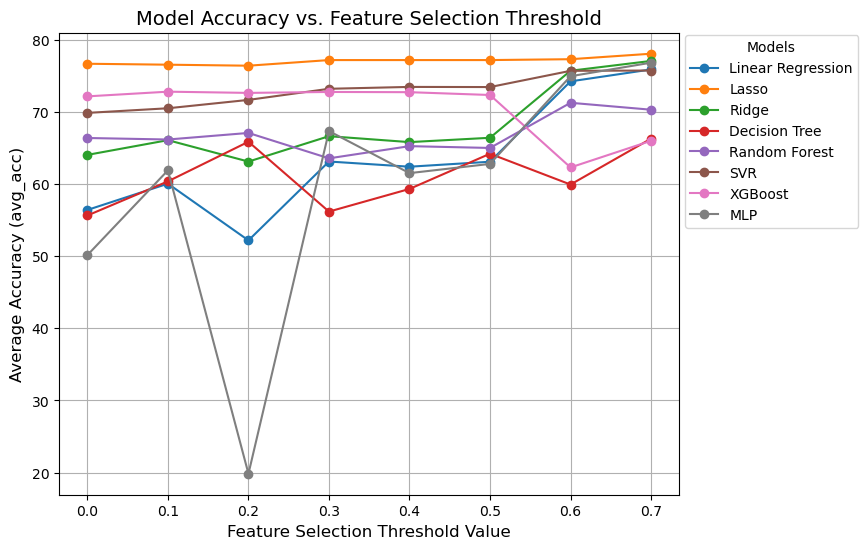

In [34]:
plt.figure(figsize=(8, 6))

# Iterate over models
for model_name, thresholds in model_accuracy_results.items():
    # Extract x (threshold values) and y (average accuracy)
    #print(thresholds.keys())
    x = list(thresholds.keys())
    y = [metrics["avg_acc"] for metrics in thresholds.values()]
    
    # Plot the line for the current model
    plt.plot(x, y, marker='o', label=model_name)

# Add labels and legend
plt.xlabel('Feature Selection Threshold Value', fontsize=12)
plt.ylabel('Average Accuracy (avg_acc)', fontsize=12)
plt.title('Model Accuracy vs. Feature Selection Threshold', fontsize=14)
plt.legend(title="Models", loc='upper right', bbox_to_anchor=(1.3, 1.01))
plt.grid(True)

# Show the plot
plt.show()

### <b>(D) <u>Result And Chart</u></b>

In [36]:
# setup Display function for table and chart, also export the result csv
import statistics
import ipywidgets as widgets
from ipywidgets import HBox, Output
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

def displayResultAccuracyTableAndChart(df_with_date, y_predict, y_test, avg_acc, min_acc, model_name):
    header = f"### {model_name}"

    date_list = df_with_date.iloc[-12:,0].values.tolist()
    y_test_list = y_test.values.tolist()
    y_predict_list = y_predict.tolist()
    accuracy_list = [round(accuracy(y_test_list[i], y_predict_list[i]), 2) for i in range(12)]

    #average_accuracy = round(statistics.mean(accuracy_list), 2)
    #min_accuracy = round(min(accuracy_list), 2)

    # table_md = "|| | ||\n"
    # table_md += "|-|-|-|-|\n"
    # table_md += f"|||average accuracy|{average_accuracy}|\n"
    # table_md += f"|||min. accuracy|{min_accuracy}|\n"
    # table_md += "<br>"

    data = {
        'date' : date_list,
        'actual value' : y_test_list,
        'predict value' : y_predict_list,
        'accuracy %' : accuracy_list
    }

    df = pd.DataFrame(data)
    df['actual value'] = df['actual value'].map(lambda x: f"{x:.2f}")
    df['predict value'] = df['predict value'].map(lambda x: f"{x:.2f}")
    df['accuracy %'] = df['accuracy %'].map(lambda x: f"{x:.2f}")
    
    # df.style.format({
    #     'actual value' : '{:.2f}',
    #     'predict value' : '{:.2f}',
    #     'accuracy %' : '{:.2f}',
    # })
    
    additional_rows = pd.DataFrame({
        'date': ['', ''],
        'actual value': ['', ''],
        'predict value': ['average accuracy', 'min. accuracy'],
        'accuracy %': [avg_acc, min_acc]
    })
    df = pd.concat([df, additional_rows], ignore_index=True)

    export_csv(df, model_name)

    data_id = [i+1 for i in range(12)]

    # Convert fig to a widget
    fig_output = Output()
    with fig_output:
        fig, ax = plt.subplots(figsize=(10, 5))
        bars = ax.bar(data_id, accuracy_list, color='lightblue', alpha=0.5)
        ax.bar_label(bars, fmt='%.2f')
        ax.set_ylabel('accuracy %')

        ax2 = ax.twinx()
        ax2.plot(data_id, y_test_list, label='actual value', marker='o', color='orange', markersize=4, linewidth=2)
        ax2.plot(data_id, y_predict_list, label='predict value', marker='x', color='blue', linestyle='-', markersize=4, linewidth=2)
        ax2.set_xticks(data_id)       # Set x-ticks to be at positions 1 to 12
        ax2.set_xticklabels(data_id)  # Set the labels to be the indices 1 to 12
        ax2.set_xlabel('date index')
        ax2.set_ylabel('value')
        
        plt.title(f"Test Data Actual and Predict Value ({model_name})")
        ax2.legend(loc='upper right', bbox_to_anchor=(1, 1.2))
        
        plt.tight_layout()
        plt.show()
        
    # Convert table to a widget
    table_output = Output()
    with table_output:
        display(Markdown(header))
        # display with H Box
        # display(df.style.format({
        #             'actual value' : '{:.2f}',
        #             'predict value' : '{:.2f}',
        #             'accuracy %' : '{:.2f}',
        #         }), display_id=True)
        display(df, display_id=False)
        #display(Markdown(table_md))

    table_output.layout.margin = '0 60px 0 0'  # Add right margin to the table

    # Display both the table and chart side by side
    #display(Markdown(header))
    hbox = HBox([table_output, fig_output])
    display(hbox)

In [37]:
display(Markdown("### All Models (Default Configuration) Best Result with corresponding feature threshold selection Summary"))
display(Markdown(model_result_table_md))

### All Models (Default Configuration) Best Result with corresponding feature threshold selection Summary

|model|feature threshold|MAE|RMSE|R2|Avg Accuracy(%)|Min Accuracy(%)|
|-|-|-|-|-|-|-|
|Linear Regression|0.70|43.6472|54.7000|-0.7642|75.87|27.68
|Lasso|0.70|38.7068|47.8371|-0.3493|78.05|45.70
|Ridge|0.70|40.7209|51.6782|-0.5746|77.05|36.91
|Decision Tree|0.70|58.8644|70.6796|-1.9455|66.28|30.42
|Random Forest|0.60|50.6612|59.2204|-1.0678|71.25|37.18
|SVR|0.70|47.0465|57.8384|-0.9724|75.72|54.39
|XGBoost|0.10|40.6447|46.3956|-0.2692|72.79|40.38
|MLP|0.70|41.8809|52.6777|-0.6361|76.81|35.52


In [38]:
for model_name, thresold_obj in model_accuracy_results.items():
    for threshold_val, metrics in thresold_obj.items():
        if (threshold_val == model_best_accuracy_feature_threshold[model_name]):
            displayResultAccuracyTableAndChart(dataset[dataset_name_with_date],
                                               metrics['y_pred'],
                                               metrics['y_test'],
                                               metrics['avg_acc'],
                                               metrics['min_acc'],
                                               f'{model_name}_(default_cfg)_(feature_threshold-{threshold_val})')

---

### <b>(2) <u>Performance Improvement</u></b> 
### The Next Step is to do the evaluation to find the best configuration of each model to the dataset
<br>

In [41]:
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV, RandomizedSearchCV

In [42]:
# base on the positive result from default configuration to add some variation for hyperparameters searching
models_params_cfg = {
    "Linear Regression" : {
                                'fit_intercept': [True, False],  # Whether to calculate the intercept
                                'positive': [False],             # Enforce positivity of coefficients
                                'copy_X': [True, False]          # Whether to copy X before fitting
                          },

                "Lasso" : {
                                'alpha': np.logspace(-4, 4, 10),  # from 0.0001 to 10000, #[0.005, 0.02, 0.03, 0.05, 0.06] # Regularization strength
                                'copy_X': [True],
                                'fit_intercept': [True],
                                'positive': [False],
                                'precompute': [False],
                                'selection': ['cyclic'],
                                'max_iter': [1000, 5000, 10000],  # Max number of iterations
                                'tol': [1e-4, 1e-3, 1e-2],        # Tolerance for stopping criteria
                                'warm_start': [False]
                          },

                "Ridge" :{
                                'alpha': np.logspace(-4, 4, 10),  # from 0.0001 to 10000 #[0.1, 1, 10, 100, 1000] # Regularization strength
                                'copy_X': [True],
                                'fit_intercept': [True],
                                'positive': [False],
                                'solver': ['auto'],
                                'max_iter': [1000, 5000, 10000, None],  # Max number of iterations
                                'tol': [1e-4, 1e-3, 1e-2],        # Tolerance for stopping criteria
                         },

         "Decision Tree": {
                                'criterion': ['squared_error'],                  # ['squared_error', 'friedman_mse', 'poisson']
                                'splitter': ['best'],
                                'max_depth': [5, 10, 15, None],                  # Depth of the tree
                                'min_samples_split': [2, 5, 10],                 # Minimum samples to split a node
                                'min_samples_leaf': [1, 2, 4],                   # Minimum samples to be a leaf node
                                'min_weight_fraction_leaf': [0.0, 0.1],          # Weighted fraction of samples
                                'max_features': [None],                          # Features to consider for splits
                                'monotonic_cst': [None],
                                #'random_state': [42],
                                'max_leaf_nodes': [None, 10, 50],                # Max number of leaf nodes
                                'min_impurity_decrease': [0.0, 0.1, 0.2],        # Minimum impurity decrease to split
                                'ccp_alpha': [0.0, 0.01, 0.1]                    # Complexity parameter for pruning
                          },

        "Random Forest" : {
                                'n_estimators': np.logspace(1, 3, 3).astype(int),  # From 10 to 1000
                                'max_depth': [None, 10, 20],                       # Max depth options [None, 10, 20, 30]
                                'criterion': ['squared_error'],                    # ['squared_error', 'absolute_error']
                                'min_samples_split': [2, 5, 10],                   # Minimum samples to split a node
                                'min_samples_leaf': [1, 2, 4],                     # Minimum samples to be a leaf node
                                #'min_weight_fraction_leaf': [0.0, 0.1],            # Weighted fraction of samples
                                'ccp_alpha': [0.0, 0.01]                           # Complexity parameter for pruning [0.0, 0.01, 0.1]
                          },

                  "SVR" : {
                                'C': [1, 10],                             # Regularization parameter, [1, 10, 100, 1000]
                                'epsilon': [0.1, 0.5],                    # Epsilon for regression error [0.1, 0.2, 0.5, 1.0]
                                'gamma': ['scale', 0.1],                   # Kernel coefficient ['scale', 'auto', 0.1, 0.5]
                                'kernel': ['linear', 'rbf'],               # Kernel type ['linear', 'rbf', 'poly']
                                'degree': [3],                             # Degree of polynomial kernel [3, 4, 5]
                                'shrinking': [True],                       # Whether to use the shrinking heuristic [True, False]
                                'cache_size': [200],                       # Size of the kernel cache (MB) [200, 500, 1000]
                                'max_iter': [-1]                           # Maximum iterations [-1, 1000, 5000]
                          },

                "XGBoost" : {
                                'objective': ['reg:squarederror'],
                                'enable_categorical': [False],
                                'n_estimators': [100, 200],                        # Number of boosting rounds [100, 200, 500]
                                'learning_rate': [0.01, 0.1, 0.2],                  # Learning rate (step size) [0.01, 0.1, 0.2]
                                'max_depth': [None],                               # Max depth of tree [3, 6, 9]
                                'min_child_weight': [None],                      # Min child weight
                                'subsample': [0.8, 0.9, 1.0],                          # Fraction of samples for each tree [0.8, 0.9, 1.0]
                                'colsample_bytree': [0.8, 0.9],                    # Fraction of features for each tree [0.8, 0.9, 1.0]
                                'gamma': [None],                               # Minimum loss reduction for pruning
                                'lambda': [None],                               # L2 regularization
                                'alpha': [None],                               # L1 regularization
                                'booster': [None],                              # Type of boosting model ['gbtree', 'dart']
                            },

                    "MLP" : {
                                # 'hidden_layer_sizes': [(50,), (100,), (100, 50), (200, 100), (200, 100, 50)],    # Number of neurons in each hidden layer [(50,), (100,), (100, 50), (200, 100)]
                                # 'activation': ['relu'],                              # Activation function for hidden layers ['relu', 'tanh', 'logistic']
                                # 'solver': ['adam'],                                     # Solver for optimization ['adam', 'sgd', 'lbfgs']
                                # 'alpha': [0.0001, 0.001, 0.01],                                  # Regularization strength
                                # 'beta_1': [0.9],
                                # 'beta_2': [0.999],
                                # 'learning_rate': ['constant'],                               # Learning rate schedule 'constant' 'invscaling', 'adaptive'
                                # 'learning_rate_init': [0.001, 0.01, 0.1],                        # Initial learning rate
                                # 'max_iter': [30000],                                              # Maximum number of iterations
                                # 'batch_size': ['auto'],                                          # Minibatch size (only for 'sgd' or 'adam') [32, 64, 128]
                                # 'early_stopping': [False],                                 # Early stopping on validation score
                                # #'momentum': [0.8, 0.9, 0.95],                                          # Momentum for 'sgd' solver [0.9, 0.95, 0.99]
                                # 'n_iter_no_change': [10]                                     # Number of iterations with no improvement before stopping

                                # 'hidden_layer_sizes': [(50,), (100,), (100, 50), (200, 100), (200, 100, 50)],    # Number of neurons in each hidden layer [(50,), (100,), (100, 50), (200, 100)]
                                # 'activation': ['relu', 'tanh'],                                          # Activation function for hidden layers ['relu', 'tanh', 'logistic']
                                # 'solver': ['sgd'],                                               # Solver for optimization ['adam', 'sgd', 'lbfgs']
                                # 'alpha': [0.0001, 0.001, 0.01],                                  # Regularization strength
                                # #'learning_rate': ['constant', 'invscaling', 'adaptive'],         # Learning rate schedule
                                # 'learning_rate_init': [0.001, 0.01, 0.1],                        # Initial learning rate
                                # 'batch_size': [32, 64, 128],                                          # Minibatch size (only for 'sgd' or 'adam') [32, 64, 128]
                                # 'early_stopping': [True],                                 # Early stopping on validation score
                                # 'momentum': [0.9, 0.95, 0.99],                                          # Momentum for 'sgd' solver [0.9, 0.95, 0.99]
                                # #'n_iter_no_change': [10, 20],                                     # Number of iterations with no improvement before stopping
                                # 'max_iter': [30000]

                                'hidden_layer_sizes': [(50,), (100,), (100, 50)],                # Number of neurons in each hidden layer [(50,), (100,), (100, 50), (200, 100)]
                                'activation': ['tanh', 'logistic'],                              # Activation function for hidden layers ['relu', 'tanh', 'logistic']
                                'solver': ['sgd'],                                               # Solver for optimization ['adam', 'sgd', 'lbfgs']
                                'alpha': [0.0001, 0.001, 0.01],                                  # Regularization strength
                                #'learning_rate': ['constant', 'invscaling', 'adaptive'],         # Learning rate schedule
                                'learning_rate_init': [0.001, 0.01, 0.1],                        # Initial learning rate
                                'max_iter': [30000],                                              # Maximum number of iterations
                                'batch_size': [32, 64],                                          # Minibatch size (only for 'sgd' or 'adam') [32, 64, 128]
                                #'early_stopping': [True, False],                                 # Early stopping on validation score
                                'momentum': [0.9, 0.95],                                          # Momentum for 'sgd' solver [0.9, 0.95, 0.99]
                                #'n_iter_no_change': [10, 20]                                     # Number of iterations with no improvement before stopping
                            }
}

In [43]:
# Initialize TimeSeriesSplit with 5 splits
grid_search_model_obj = {}

threshold_to_data_list_map = {0: 0,
                          0.1: 1,
                          0.2: 2,
                          0.3: 3,
                          0.4: 4,
                          0.5: 5,
                          0.6: 6,
                          0.7: 7,
                          0.8: 8}

# Initialize the model again
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(random_state=42),
    "Ridge": Ridge(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "SVR": SVR(),
    "XGBoost": XGBRegressor(objective="reg:squarederror", random_state=42),
    "MLP": MLPRegressor(max_iter=30000, random_state=42)
}

#model_best_accuracy_feature_threshold

# Initialize the result
model_accuracy_results_best_cfg = {}

model_result_best_cfg_table_md = "|model|feature threshold|MAE|RMSE|R2|Avg Accuracy(%)|Min Accuracy(%)|\n"
model_result_best_cfg_table_md += "|-|-|-|-|-|-|-|\n"

# there are three scoring methods
scoring_method = 'neg_mean_squared_error' # neg_mean_squared_error, neg_mean_absolute_error, r2

for model_name, model in models.items():

    threshold_val = model_best_accuracy_feature_threshold[model_name]

    data_index = threshold_to_data_list_map[threshold_val]

    timeseries_cv = TimeSeriesSplit(n_splits=5)
    
    # grid_search_model_obj[model_name] = RandomizedSearchCV(estimator=model, param_distributions=models_params_cfg[model_name], cv=timeseries_cv, scoring=scoring_method,
    #                                                   random_state=42,
    #                                                   n_iter=8,
    #                                                   n_jobs=-1, # use all CPU to work
    #                                                   verbose=1) # display progress

    grid_search_model_obj[model_name] = GridSearchCV(estimator=model, param_grid=models_params_cfg[model_name], cv=timeseries_cv, scoring=scoring_method,
                                                      n_jobs=-1, # use all CPU to work
                                                      verbose=0) # display progress
    
    # Fit the GridSearchCV by training set (use training set to split for evaluation)
    grid_search_model_obj[model_name].fit(Xs_train[data_index], y_train)

    # Best parameters and best score
    display(Markdown(f"### {model_name}_Best_Configuration_Result_(feature threshold = {threshold_val})"))
    print(f"{model_name}, Best Parameters:", grid_search_model_obj[model_name].best_params_)
    print(f"{model_name}, Best Score:", grid_search_model_obj[model_name].best_score_)
    print("---------------------------------------------------------------------------\n")

    # Test the result
    best_configured_model = grid_search_model_obj[model_name].best_estimator_
    y_pred = best_configured_model.predict(Xs_test[data_index])
    
    # Calculate the performance
    mae, rmse, r2, avg_acc, min_acc = calculate_performance(y_test, y_pred)

    if (model_name not in model_accuracy_results_best_cfg):
        model_accuracy_results_best_cfg[model_name] = {}
    model_accuracy_results_best_cfg[model_name][threshold_val] = {
        "MAE": mae,
        "RMSE": rmse,
        "R2" : r2,
        "y_pred" : y_pred,
        "y_test" : y_test,
        "avg_acc": avg_acc,
        "min_acc" : min_acc}
    
    model_result_best_cfg_table_md += f"|{model_name}|{threshold_val:.2f}|{mae:.4f}|{rmse:.4f}|{r2:.4f}|{avg_acc:.2f}|{min_acc:.2f}\n"


### Linear Regression_Best_Configuration_Result_(feature threshold = 0.7)

Linear Regression, Best Parameters: {'copy_X': True, 'fit_intercept': True, 'positive': False}
Linear Regression, Best Score: -1142.880464094511
---------------------------------------------------------------------------



### Lasso_Best_Configuration_Result_(feature threshold = 0.7)

Lasso, Best Parameters: {'alpha': 0.046415888336127774, 'copy_X': True, 'fit_intercept': True, 'max_iter': 1000, 'positive': False, 'precompute': False, 'selection': 'cyclic', 'tol': 0.001, 'warm_start': False}
Lasso, Best Score: -1111.9052164358031
---------------------------------------------------------------------------



### Ridge_Best_Configuration_Result_(feature threshold = 0.7)

Ridge, Best Parameters: {'alpha': 0.3593813663804626, 'copy_X': True, 'fit_intercept': True, 'max_iter': 1000, 'positive': False, 'solver': 'auto', 'tol': 0.0001}
Ridge, Best Score: -1116.4219976219392
---------------------------------------------------------------------------



### Decision Tree_Best_Configuration_Result_(feature threshold = 0.7)

Decision Tree, Best Parameters: {'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': 10, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 4, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'splitter': 'best'}
Decision Tree, Best Score: -1083.0651836046004
---------------------------------------------------------------------------



C:\Users\demon\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


### Random Forest_Best_Configuration_Result_(feature threshold = 0.6)

Random Forest, Best Parameters: {'ccp_alpha': 0.01, 'criterion': 'squared_error', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1000}
Random Forest, Best Score: -1123.785100096813
---------------------------------------------------------------------------



### SVR_Best_Configuration_Result_(feature threshold = 0.7)

SVR, Best Parameters: {'C': 10, 'cache_size': 200, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'shrinking': True}
SVR, Best Score: -1256.4465694555547
---------------------------------------------------------------------------



### XGBoost_Best_Configuration_Result_(feature threshold = 0.1)

XGBoost, Best Parameters: {'alpha': None, 'booster': None, 'colsample_bytree': 0.9, 'enable_categorical': False, 'gamma': None, 'lambda': None, 'learning_rate': 0.1, 'max_depth': None, 'min_child_weight': None, 'n_estimators': 100, 'objective': 'reg:squarederror', 'subsample': 1.0}
XGBoost, Best Score: -1589.4349477888745
---------------------------------------------------------------------------



C:\Users\demon\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:1114: RuntimeWarning: overflow encountered in square
  (array - array_means[:, np.newaxis]) ** 2, axis=1, weights=weights


### MLP_Best_Configuration_Result_(feature threshold = 0.7)

MLP, Best Parameters: {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 64, 'hidden_layer_sizes': (50,), 'learning_rate_init': 0.01, 'max_iter': 30000, 'momentum': 0.9, 'solver': 'sgd'}
MLP, Best Score: -1037.7507950831937
---------------------------------------------------------------------------



In [44]:
display(Markdown("### All Models (Best Configuration) Result with corresponding feature threshold selection Summary"))
display(Markdown(model_result_best_cfg_table_md))

### All Models (Best Configuration) Result with corresponding feature threshold selection Summary

|model|feature threshold|MAE|RMSE|R2|Avg Accuracy(%)|Min Accuracy(%)|
|-|-|-|-|-|-|-|
|Linear Regression|0.70|43.6472|54.7000|-0.7642|75.87|27.68
|Lasso|0.70|42.1520|53.3630|-0.6790|76.42|30.21
|Ridge|0.70|41.5904|52.5265|-0.6268|76.72|33.83
|Decision Tree|0.70|52.2264|66.5283|-1.6096|69.56|13.03
|Random Forest|0.60|51.8450|60.7190|-1.1738|70.62|37.17
|SVR|0.70|41.1406|50.6380|-0.5119|77.77|52.83
|XGBoost|0.10|43.9523|53.9873|-0.7185|69.51|25.37
|MLP|0.70|47.9661|62.5709|-1.3084|72.74|14.31


In [45]:
for model_name, thresold_obj in model_accuracy_results_best_cfg.items():
    for threshold_val, metrics in thresold_obj.items():
        displayResultAccuracyTableAndChart(dataset[dataset_name_with_date],
                                           metrics['y_pred'],
                                           metrics['y_test'],
                                           metrics['avg_acc'],
                                           metrics['min_acc'],
                                           f'{model_name}_best_cfg_(feature_threshold-{threshold_val})')

In [46]:
default_cfg_table_output = Output()
tuned_cfg_table_output = Output()

with default_cfg_table_output:
    display(Markdown("### All Models (Default Configuration) Result Table Summary"))
    display(Markdown(model_result_table_md))

with tuned_cfg_table_output:
    display(Markdown("### All Models (Tuned Configuration) Result Table Summary"))
    display(Markdown(model_result_best_cfg_table_md))

hbox2 = HBox([default_cfg_table_output, tuned_cfg_table_output])
# display(Markdown(f"### Under selected features by correlation threshold {thresholds}"))
# feature_size = len(features_above_threshold)
# display(Markdown(f"### Features used (Size : {feature_size}) {features_above_threshold}"))
display(hbox2)

for model_name, model in models.items():
    display(Markdown(f"### {model_name}_Default_Configuration"))
    print(f"{model_name}, Default Parameters:", model.get_params())
    display(Markdown(f"### {model_name}_Tuned_Configuration"))
    print(f"{model_name}, Best Parameters:", grid_search_model_obj[model_name].best_params_)
    display(Markdown("---"))

### Linear Regression_Default_Configuration

Linear Regression, Default Parameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}


### Linear Regression_Tuned_Configuration

Linear Regression, Best Parameters: {'copy_X': True, 'fit_intercept': True, 'positive': False}


---

### Lasso_Default_Configuration

Lasso, Default Parameters: {'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': 1000, 'positive': False, 'precompute': False, 'random_state': 42, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False}


### Lasso_Tuned_Configuration

Lasso, Best Parameters: {'alpha': 0.046415888336127774, 'copy_X': True, 'fit_intercept': True, 'max_iter': 1000, 'positive': False, 'precompute': False, 'selection': 'cyclic', 'tol': 0.001, 'warm_start': False}


---

### Ridge_Default_Configuration

Ridge, Default Parameters: {'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'positive': False, 'random_state': None, 'solver': 'auto', 'tol': 0.0001}


### Ridge_Tuned_Configuration

Ridge, Best Parameters: {'alpha': 0.3593813663804626, 'copy_X': True, 'fit_intercept': True, 'max_iter': 1000, 'positive': False, 'solver': 'auto', 'tol': 0.0001}


---

### Decision Tree_Default_Configuration

Decision Tree, Default Parameters: {'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 42, 'splitter': 'best'}


### Decision Tree_Tuned_Configuration

Decision Tree, Best Parameters: {'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': 10, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 4, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'splitter': 'best'}


---

### Random Forest_Default_Configuration

Random Forest, Default Parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


### Random Forest_Tuned_Configuration

Random Forest, Best Parameters: {'ccp_alpha': 0.01, 'criterion': 'squared_error', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1000}


---

### SVR_Default_Configuration

SVR, Default Parameters: {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}


### SVR_Tuned_Configuration

SVR, Best Parameters: {'C': 10, 'cache_size': 200, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'shrinking': True}


---

### XGBoost_Default_Configuration

XGBoost, Default Parameters: {'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 42, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}


### XGBoost_Tuned_Configuration

XGBoost, Best Parameters: {'alpha': None, 'booster': None, 'colsample_bytree': 0.9, 'enable_categorical': False, 'gamma': None, 'lambda': None, 'learning_rate': 0.1, 'max_depth': None, 'min_child_weight': None, 'n_estimators': 100, 'objective': 'reg:squarederror', 'subsample': 1.0}


---

### MLP_Default_Configuration

MLP, Default Parameters: {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 30000, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 42, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


### MLP_Tuned_Configuration

MLP, Best Parameters: {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 64, 'hidden_layer_sizes': (50,), 'learning_rate_init': 0.01, 'max_iter': 30000, 'momentum': 0.9, 'solver': 'sgd'}


---